<a href="https://colab.research.google.com/github/wehs7661/deep_learning_projects/blob/master/covid_regression/DNN_test_positive/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring feature selection: Taking COVID-19 positive rate prediction as an example**

In this notebook, we will explore the application of various feature selection methods to the neural network for predicting the COVID-19 positive rate, using the datasets adapted from [daily surveys conducted by the Delphi Group @ CMU](https://delphi.cmu.edu/covidcast/). This notebook is adapted from the [notebook](https://github.com/ga642381/ML2021-Spring/blob/main/HW01/HW01.ipynb) written by Heng-Jui Chang @ NTUEE as the first homework in the class of 2021 Machine Learning class taught by Dr. Hung-Yi Lee @ NTUEE. The final result of the original assignment is a CSV file containing the predictions of the COVID-19 positive rate generated from the neural network built and trained in the assignment, which should be uploaded to the corresponding [Kaggle competition](https://www.kaggle.com/c/ml2021spring-hw1/data) to assess the model by calculating the test loss. 


## **1. Statement of the problem**
Now, before we dive into what feature selection methods we are going to explore, let's first understand our task by taking a look at the training set and the test set.

In [1]:
# The data below can also be downloaded from Kaggle.
tr_path = 'covid.train.csv'  # path to training data
tt_path = 'covid.test.csv'   # path to testing data

!gdown --id '19CCyCgJrUxtvgZF53vnctJiOJ23T5mqF' --output covid.train.csv
!gdown --id '1CE240jLm2npU-tdz81-oVKEF3T2yfT1O' --output covid.test.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19CCyCgJrUxtvgZF53vnctJiOJ23T5mqF
To: /content/covid.train.csv
100% 2.00M/2.00M [00:00<00:00, 86.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1CE240jLm2npU-tdz81-oVKEF3T2yfT1O
To: /content/covid.test.csv
100% 651k/651k [00:00<00:00, 24.4MB/s]


In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None) # to show all coumns below
df = pd.read_csv('covid.train.csv'); df

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,IL,IN,IA,KS,KY,LA,MD,MA,MI,MN,MS,MO,NE,NV,NJ,NM,NY,NC,OH,OK,OR,PA,RI,SC,TX,UT,VA,WA,WV,WI,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,felt_isolated,worried_become_ill,worried_finances,tested_positive,cli.1,ili.1,hh_cmnty_cli.1,nohh_cmnty_cli.1,wearing_mask.1,travel_outside_state.1,work_outside_home.1,shop.1,restaurant.1,spent_time.1,large_event.1,public_transit.1,anxious.1,depressed.1,felt_isolated.1,worried_become_ill.1,worried_finances.1,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2,wearing_mask.2,travel_outside_state.2,work_outside_home.2,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2,tested_positive.2
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.814610,0.771356,25.648907,21.242063,84.644672,13.462475,36.519841,63.139094,23.835119,44.726055,16.946929,1.716262,15.494193,12.043275,17.000647,53.439316,43.279629,19.586492,0.838995,0.807767,25.679101,21.280270,84.005294,13.467716,36.637887,63.318650,23.688882,44.385166,16.463551,1.664819,15.299228,12.051505,16.552264,53.256795,43.622728,20.151838,0.897802,0.887893,26.060544,21.503832,84.438618,13.038611,36.429119,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838995,0.807767,25.679101,21.280270,84.005294,13.467716,36.637887,63.318650,23.688882,44.385166,16.463551,1.664819,15.299228,12.051505,16.552264,53.256795,43.622728,20.151838,0.897802,0.887893,26.060544,21.503832,84.438618,13.038611,36.429119,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935,0.972842,0.965496,25.754087,21.016210,84.133873,12.581952,36.416557,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.897802,0.887893,26.060544,21.503832,84.438618,13.038611,36.429119,62.434539,23.812411,43.430423,16.151527,1.602635,15.409449,12.088688,16.702086,53.991549,43.604229,20.704935,0.972842,0.965496,25.754087,21.016210,84.133873,12.581952,36.416557,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911,0.955306,0.963079,25.947015,20.941798,83.995931,12.938675,37.014578,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.972842,0.965496,25.754087,21.016210,84.133873,12.581952,36.416557,62.024517,23.682974,43.196313,16.123386,1.641863,15.230063,11.809047,16.506973,54.185521,42.665766,21.292911,0.955306,0.963079,25.947015,20.941798,83.995931,12.938675,37.014578,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656,0.947513,0.968764,26.350501,21.109971,83.819531,12.452336,36.270021,61.294809,22.576992,42.954574,15.544373,1.578030,15.295650,12.218123,16.045504,52.446223,42.907472,19.896607
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.955306,0.963079,25.947015,20.941798,83.995931,12.938675,37.014578,62.116842,23.593983,43.362200,16.159971,1.677523,15.717207,12.355918,16.273294,53.637069,42.972417,21.166656,0.947

As shown above, the training set has 2700 samples and 95 columns, which include:
- 1 column of the IDs
- 40 columns showing the states encoded to one-hot vectors
- 18 columns of Day 1 features
- 18 columns of Day 2 features
- 18 columns of Day 3 features

More specifically, the 18 features for each day include the follows:
- 4 columns of COVID-like illness, including
  - `ili`: Percentage of people having influenza-like illness
  - `cli`: Percentage of people having COVID-like illness
  - `hh_cmnty_cli`: Percentage of people reporintg illness in their local community, including their household
  - `noww_cmnty_cli`: Percentage of people reporting illness in their local community, not including their household 
- 8 columns of behavior indicators, including `wearing_mask`, `travel_outside_state`, `work_outside_home`, `shop`, `restaurant`, `spent_time`, `large_event`, and `public_transit`. Most names of indicators are self-explanatory, except for `spent_time`, which is the percentage of respondents who spent time indoors with someone who isn't currently staying with them in the past 24 hours. 
- 5 columns of mental health indicators, including `anxious`, `depressed`, `felt_isolated`, `worried_become_ill`, and `worried_finances`.
- 1 column showing the percentage of people who tested positive

All indicators above are expressed in percentages. For more details about how the data was collected and how the indicators were designed, please visit [this site](https://cmu-delphi.github.io/delphi-epidata/api/covidcast-signals/fb-survey.html).



As for the test set, there are 893 samples and 94 columns, with the only missing column compared with the training set being the test positive rate of Day 3 that we are going to predict using any of the 93 possible indicators as the features.

## **2. Building our first neural network without feature selection**
### **2-1. Setting things up**
First, we import the following packages, set the random seed and define a function for getting the device to be used:

In [3]:
# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For data preprocess
import numpy as np
import csv
import os

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def get_device():
    ''' Get device (if GPU is available, use GPU) '''
    return 'cuda' if torch.cuda.is_available() else 'cpu'

def set_seed(seed=42069):
    # set a random seed for reproducibility
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed()

### **2-2. Data preprocessing**
First of all, we define `COVID19Dataset`, which reads in `.csv` files, extracts features, splits `covid.train.csv` into the training/validation sets (with a ratio of 9:1) and normalizes features. 

In [4]:
class COVID19Dataset(Dataset):
    ''' Dataset for loading and preprocessing the COVID19 dataset '''
    def __init__(self, path, mode='train', feats=list(range(93))):
        """
        Prepares a dataset as specified.

        Parameters
        ----------
        path : str
            The path of the training dataset or the test set. 
        mode : str
            How the dataset should be prepared. Available options include "train", 
            "dev", and "test".
        feats: 
            The list of feature indices to consider.
        """
        self.mode = mode

        # Step 1: Read data into numpy arrays
        with open(path, 'r') as fp:
            data = list(csv.reader(fp))
            data = np.array(data[1:])[:, 1:].astype(float) # note that the ID has been left out
        
        # Step 2: Prepare the dataset
        if mode == 'test':
            # Testing data
            # data: 893 x 93 (40 states + day 1 (18) + day 2 (18) + day 3 (17))
            data = data[:, feats]
            self.data = torch.FloatTensor(data)
        else:
            # Training data (train/dev sets)
            # data: 2700 x 94 (40 states + day 1 (18) + day 2 (18) + day 3 (18))
            target = data[:, -1]
            data = data[:, feats]
            
            # Splitting training data into train & dev sets
            if mode == 'train':
                indices = [i for i in range(len(data)) if i % 10 != 0]
            elif mode == 'dev':
                indices = [i for i in range(len(data)) if i % 10 == 0]
            
            # Convert data into PyTorch tensors
            self.data = torch.FloatTensor(data[indices])
            self.target = torch.FloatTensor(target[indices])

        # Step 3: Normalize features (you may remove this part to see what will happen)
        self.data[:, 40:] = (self.data[:, 40:] - self.data[:, 40:].mean(dim=0, keepdim=True)) / self.data[:, 40:].std(dim=0, keepdim=True)
        self.dim = self.data.shape[1]

        print(f'Finished reading the {mode} set of COVID19 Dataset ({len(self.data)} samples found, each dim = {self.dim})')

    def __getitem__(self, index):
        # Returns one sample at a time
        if self.mode in ['train', 'dev']:
            # For training
            return self.data[index], self.target[index]
        else:
            # For testing (no target)
            return self.data[index]

    def __len__(self):
        # Returns the size of the dataset
        return len(self.data)

Also, we need data loaders to load in the datasets as needed.  

In [5]:
def prep_dataloader(path, mode, batch_size, feats):
    dataset = COVID19Dataset(path, mode=mode, feats=feats)
    dataloader = DataLoader(dataset, batch_size, shuffle=(mode == 'train'), drop_last=False, pin_memory=True)
    return dataloader

Then, we define a general neural network by defining the class `nn.Module` 

In [6]:
class NeuralNet(nn.Module):
    ''' A simple fully-connected deep neural network '''
    def __init__(self, input_dim, n_relu=64, n_hidden_layers=1):
        super(NeuralNet, self).__init__()
        self.nn = nn.Sequential()
        for i in range(n_hidden_layers):
            self.nn.add_module(f'Linear {i}', torch.nn.Linear(input_dim, n_relu))
            self.nn.add_module(f'Activation {i}', torch.nn.ReLU())
            input_dim = n_relu
        self.nn.add_module('Output', torch.nn.Linear(n_relu, 1))
        self.criterion = nn.MSELoss(reduction='mean')

    def forward(self, x):
        x = self.nn(x).squeeze(1)
        return x

    def cal_loss(self, pred, target):
        return self.criterion(pred, target)

Also, here we have funcitons for training, validating, and testing the neural network.

In [7]:
def train(tr_set, dv_set, model, config, device):
    n_epochs = config['n_epochs']  # Maximum number of epochs
    optimizer = getattr(torch.optim, config['optimizer'])(
        model.parameters(), **config['optim_hparas'])
    min_mse = 1000.
    loss_record = {'train': [], 'dev': []}      # for recording training loss
    early_stop_cnt = 0
    epoch = 0
    while epoch < n_epochs:
        model.train()                           # set model to training mode
        for x, y in tr_set:                     # iterate through the dataloader
            optimizer.zero_grad()               # set gradient to zero
            x, y = x.to(device), y.to(device)   # move data to device (cpu/cuda)
            pred = model(x)                     # forward pass (compute output)
            mse_loss = model.cal_loss(pred, y)  # compute loss
            mse_loss.backward()                 # compute gradient (backpropagation)
            optimizer.step()                    # update model with optimizer
            loss_record['train'].append(mse_loss.detach().cpu().item())

        # After each epoch, test your model on the validation (development) set.
        dev_mse = dev(dv_set, model, device)
        if dev_mse < min_mse:
            # Save model if your model improved
            min_mse = dev_mse
            print(f'Saving model (epoch = {epoch + 1}, validation loss = {min_mse:.4f}')
            torch.save(model.state_dict(), config['save_path'])  # Save model to specified path
            early_stop_cnt = 0
        else:
            early_stop_cnt += 1

        epoch += 1
        loss_record['dev'].append(dev_mse)
        if early_stop_cnt > config['early_stop']:
            # Stop training if your model stops improving for "config['early_stop']" epochs.
            break

    print('Finished training after {} epochs'.format(epoch))
    return min_mse, loss_record

In [8]:
def dev(dv_set, model, device):
    model.eval()                                # set model to evalutation mode
    total_loss = 0
    for x, y in dv_set:                         # iterate through the dataloader
        x, y = x.to(device), y.to(device)       # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            mse_loss = model.cal_loss(pred, y)  # compute loss
        total_loss += mse_loss.detach().cpu().item() * len(x)  # accumulate loss
    total_loss = total_loss / len(dv_set.dataset)              # compute averaged loss

    return total_loss

In [9]:
def test(tt_set, model, device):
    model.eval()                                # set model to evalutation mode
    preds = []
    for x in tt_set:                            # iterate through the dataloader
        x = x.to(device)                        # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            preds.append(pred.detach().cpu())   # collect prediction
    preds = torch.cat(preds, dim=0).numpy()     # concatenate all predictions and convert to a numpy array
    return preds

Then, we define the function `nn_workflow` to combine all three functions above, as we are going to test out a lot of different models.

In [10]:
def nn_workflow(config, tr_path='covid.train.csv', tt_path='covid.test.csv'):
    device = get_device()                    # get the current available device ('cpu' or 'cuda')
    os.makedirs('models', exist_ok=True)     # The trained model will be saved to ./models/

    tr_set = prep_dataloader(tr_path, 'train', config['batch_size'], feats=config['feats'])
    dv_set = prep_dataloader(tr_path, 'dev', config['batch_size'], feats=config['feats'])
    tt_set = prep_dataloader(tt_path, 'test', config['batch_size'], feats=config['feats'])

    model = NeuralNet(tr_set.dataset.dim).to(device)  # Construct model and move to device

    model_loss, model_loss_record = train(tr_set, dv_set, model, config, device)    # start training the model!

    return {'tr_set': tr_set, 'dv_set': dv_set, 'tt_set': tt_set}, model, model_loss_record

Now, let's build and train our first neural network, which will use all the possible 93 indicators as features (i.e. no feature selection at all). 

In [30]:
config = {
    'feats': list(range(93)),        # consider all features (i.e. no feature selection)    
    'n_epochs': 3000,                # maximum number of epochs
    'batch_size': 270,               # mini-batch size for dataloader
    'optimizer': 'SGD',              # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {                # hyper-parameters for the optimizer (depends on which optimizer you are using)
        'lr': 0.001,                 # learning rate of SGD
        'momentum': 0.9              # momentum for SGD
    },
    'early_stop': 200,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 93)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 93)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 93)
Saving model (epoch = 1, validation loss = 72.4640
Saving model (epoch = 2, validation loss = 45.3732
Saving model (epoch = 3, validation loss = 31.6274
Saving model (epoch = 4, validation loss = 17.9039
Saving model (epoch = 5, validation loss = 10.2930
Saving model (epoch = 6, validation loss = 6.6676
Saving model (epoch = 7, validation loss = 5.4839
Saving model (epoch = 8, validation loss = 4.5378
Saving model (epoch = 9, validation loss = 4.0292
Saving model (epoch = 10, validation loss = 3.6040
Saving model (epoch = 11, validation loss = 3.2605
Saving model (epoch = 12, validation loss = 2.9977
Saving model (epoch = 13, validation loss = 2.7261
Saving model (epoch = 14, validation loss = 2.5697
Saving model (epoch = 15, validation 

As shown above, the model was trained for 1524 epochs and the minimum loss validation loss was 0.7598. The training loss and validation loss as functions of the number of training steps can be plotted as follows.

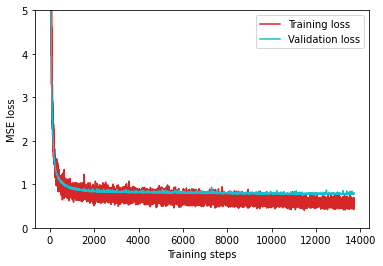

In [12]:
total_steps = len(loss_record['train'])
x_1 = range(total_steps)
x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]
figure(figsize=(6, 4))
plt.plot(x_1, loss_record['train'], c='tab:red', label='Training loss')
plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='Validation loss')
plt.ylim(0.0, 5.)
plt.xlabel('Training steps')
plt.ylabel('MSE loss')
plt.legend()
plt.legend()
plt.show()

Additionally, we can assess the neural network by comparing its prediction with the labels in the validation set.

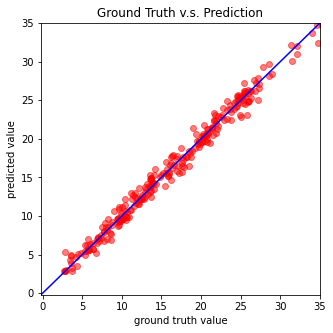

In [13]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

model.eval()
preds, targets = [], []
for x, y in datasets['dv_set']:
    x, y = x.to(device), y.to(device)
    with torch.no_grad():
        pred = model(x)
        preds.append(pred.detach().cpu())
        targets.append(y.detach().cpu())
preds = torch.cat(preds, dim=0).numpy()
targets = torch.cat(targets, dim=0).numpy()

figure(figsize=(5, 5))
plt.scatter(targets, preds, c='r', alpha=0.5)
plt.plot([-0.2, 35], [-0.2, 35], c='b')
plt.xlim(-0.2, 35)
plt.ylim(-0.2, 35)
plt.xlabel('ground truth value')
plt.ylabel('predicted value')
plt.title('Ground Truth v.s. Prediction')
plt.show()

The most importantly, we need to save predictions and upload it to Kaggle to assess the model by calculating the test loss.

In [14]:
def save_pred(tt_set, model, pred_path):
    device = get_device()
    preds = test(tt_set, model, device)

    with open(pred_path, 'w') as fp:
        writer = csv.writer(fp)
        writer.writerow(['id', 'tested_positive'])
        for i, p in enumerate(preds):
            writer.writerow([i, p])

In [15]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_0.csv')

As can be examined on Kaggle, the predictions in `pred_0.csv` have a test loss of xxxx, which is much higher than the minimum validation loss of 0.7598. Therefore, there is clearly an issue of overfitting in the model that consider all the 93 features, which is why we want to perform feature selection.

## **3. Filter-based feature selection**
Filter-based selection methods filter out features based on a user-selected metric. For example, one could examine the absolute value of the Pearson's correlation coefficient ($r$) between the target and each of the features and keep the top $k$ features that have the highest value of $r$. In `scikit-learn`, the following metrics are available. (Check the [documentation](https://scikit-learn.org/stable/modules/feature_selection.html) of scikit-learn for more informaiton.)
- For regression
  - Pearson correlation coefficient ([`r_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html#sklearn.feature_selection.r_regression))
  - F-statistics ([`f_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression))
  - Mutual information for a continuous target variable ([`mutual_info_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression))
- For classification
  - $\chi^2$ value ([chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2))
  - ANOVA F-value ([`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2))
  - Mutual information for a discrete target variable ([`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif))


Notably, some people also use principal component analysis (PCA) to estimate the contribution of each of the transformed features (which is a linear combination of the original features) to the variance of the output variable, and leave out the ones that contribute the least. Here, let's just focus on non-transformed features. Below, let's try all the three metrics for regression in our filter-based feature selection. Note that below we use `SelectKBest` to select to $k$ highest features scoring features, but one could also select the highest scording percentage of features with `SelectPercentile` or other tools like `SelectFpr`, `SelectFdr`, `SelectFwe`, or `GenericUnivariateSelect`. Here, we will only use `SelectKBest` for now. 

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression             # metric 1 
from sklearn.feature_selection import f_regression             # metric 2
from sklearn.feature_selection import mutual_info_regression   # metric 3

In [17]:
data = pd.read_csv('covid.train.csv')
x = data[data.columns[1:94]]
y = data[data.columns[94]]

In [18]:
def filter_features(x, y, score_func):
    best_feats = SelectKBest(score_func=score_func, k=5)  # the value of k doesn't matter since we will decide how many to pick later
    fit = best_feats.fit(x, y)

    result = pd.concat([pd.DataFrame(data.columns[1:94]), pd.DataFrame(fit.scores_)], axis=1)
    result.columns = ['Features', 'Score']
    print(result.nlargest(93, 'Score'))  # print the best 15 features

    # Below we generate a list of indices corresponding to all features ranked from the highest score to the lowest
    idx_list = [result.nlargest(len(result), 'Score').iloc[i].name for i in range(len(result))] 

    return idx_list


First, we try to use the Pearson correlation coefficient as the metric:

In [19]:
idx_list_0 = filter_features(x, y, r_regression)

             Features     Score
75  tested_positive.1  0.991012
57    tested_positive  0.981165
42       hh_cmnty_cli  0.879724
60     hh_cmnty_cli.1  0.879438
78     hh_cmnty_cli.2  0.878218
..                ...       ...
65             shop.1 -0.412705
83             shop.2 -0.415130
51     public_transit -0.448360
69   public_transit.1 -0.449079
87   public_transit.2 -0.450436

[93 rows x 2 columns]


Then, we use F-statistics:

In [20]:
idx_list_1 = filter_features(x, y, f_regression)

             Features          Score
75  tested_positive.1  148069.658278
57    tested_positive   69603.872591
42       hh_cmnty_cli    9235.492094
60     hh_cmnty_cli.1    9209.019558
78     hh_cmnty_cli.2    9097.375172
..                ...            ...
89        depressed.2       2.362492
11                 IN       1.291780
39                 WI       0.489577
15                 LA       0.117097
25                 NM       0.012080

[93 rows x 2 columns]


Finally, we try the mutual information:

In [21]:
idx_list_2 = filter_features(x, y, mutual_info_regression)

             Features     Score
75  tested_positive.1  2.047044
57    tested_positive  1.664484
78     hh_cmnty_cli.2  0.980106
42       hh_cmnty_cli  0.974405
60     hh_cmnty_cli.1  0.971703
..                ...       ...
0                  AL  0.014870
3                  AR  0.014597
18                 MI  0.010579
19                 MN  0.006282
11                 IN  0.005286

[93 rows x 2 columns]


In [22]:
print(idx_list_0[:15])
print(idx_list_1[:15])
print(idx_list_2[:15])

[75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77, 92]
[75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77, 92]
[75, 57, 78, 42, 60, 43, 79, 61, 58, 77, 40, 59, 76, 41, 84]


In [23]:
idx_list_0[:14]

[75, 57, 42, 60, 78, 43, 61, 79, 40, 58, 76, 41, 59, 77]

In [31]:
config = {
    'feats': idx_list_0[:14],        # only consider the best 14 features as decided above
    'n_epochs': 10000,                # maximum number of epochs
    'batch_size': 200,               # mini-batch size for dataloader
    'optimizer': 'Adam',              # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {                # hyper-parameters for the optimizer (depends on which optimizer you are using)
        #'lr': 0.0001,                 # learning rate of SGD
        #'momentum': 0.9              # momentum for SGD
    },
    'early_stop': 500,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'models/model.pth'  # your model will be saved here
}

datasets, model, loss_record = nn_workflow(config)

Finished reading the train set of COVID19 Dataset (2430 samples found, each dim = 14)
Finished reading the dev set of COVID19 Dataset (270 samples found, each dim = 14)
Finished reading the test set of COVID19 Dataset (893 samples found, each dim = 14)
Saving model (epoch = 1, validation loss = 275.4506
Saving model (epoch = 2, validation loss = 73.5567
Saving model (epoch = 3, validation loss = 14.0766
Saving model (epoch = 5, validation loss = 13.2827
Saving model (epoch = 6, validation loss = 12.5060
Saving model (epoch = 7, validation loss = 12.0630
Saving model (epoch = 8, validation loss = 11.6295
Saving model (epoch = 9, validation loss = 11.1133
Saving model (epoch = 10, validation loss = 10.4226
Saving model (epoch = 11, validation loss = 9.6201
Saving model (epoch = 12, validation loss = 8.7205
Saving model (epoch = 13, validation loss = 7.7734
Saving model (epoch = 14, validation loss = 6.9389
Saving model (epoch = 15, validation loss = 6.1332
Saving model (epoch = 16, valid

In [25]:
del model
device = get_device()
model = NeuralNet(datasets['tr_set'].dataset.dim).to(device)
ckpt = torch.load(config['save_path'], map_location='cpu')  # Load your best model
model.load_state_dict(ckpt)

save_pred(datasets['tt_set'], model, 'pred_1.csv')

## **4. Wrapper-based feature selection**

## **5. Embedded feature selection**